In [5]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:

#Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Import datasets
import pandas as pd

# Load datasets from Google Drive
import pandas as pd

# Load datasets from Google Drive
train = pd.read_csv('/content/drive/My Drive/ML Approach to Network Intrusion/train_data.csv')
test = pd.read_csv('/content/drive/My Drive/ML Approach to Network Intrusion/test_data.csv')





In [8]:
# preview the first 5 rows of the dataset
train.head(n = 5)


,Flow_ID,Src_IP,Src_Port,Dst_IP,Dst_Port,Protocol,Timestamp,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,...,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,192.168.3.130-200.175.2.130-38693-4444-6,192.168.3.130,38693,200.175.2.130,4444,6,10/01/2020 05:02,268599,2,3,...,0,0.0,0.0,0,0,0.0,0.0,0,0,U2R
1,192.168.3.130-200.175.2.130-3632-33747-6,200.175.2.130,33747,192.168.3.130,3632,6,10/01/2020 05:02,22194,5,5,...,0,0.0,0.0,0,0,0.0,0.0,0,0,U2R
2,192.168.3.130-200.175.2.130-8180-37217-6,200.175.2.130,37217,192.168.3.130,8180,6,10/01/2020 01:39,8782,4,4,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA
3,192.168.3.130-200.175.2.130-8180-35921-6,200.175.2.130,35921,192.168.3.130,8180,6,10/01/2020 01:39,4047,2,2,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA
4,192.168.3.130-200.175.2.130-8180-43053-6,200.175.2.130,43053,192.168.3.130,8180,6,10/01/2020 01:39,3819,2,2,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA


In [9]:
# check the data size
train.shape


(143574, 84)

In [10]:
test.shape #checking test set shape

(61592, 84)

In [11]:
# check for missing values
train.isnull().sum()

,0
Flow_ID,0
Src_IP,0
Src_Port,0
Dst_IP,0
Dst_Port,0
...,...
Idle_Mean,0
Idle_Std,0
Idle_Max,0
Idle_Min,0


In [12]:
# find missing values more than 0 for training set
train.isnull().sum() [train.isnull().sum() > 0]

,0


In [13]:
# find missing values more than 0 for testing set
test.isnull().sum() [test.isnull().sum() > 0]

,0


In [14]:
#Feature cardinality(how many unique values do we have in the datasets)
train.nunique()

,0
Flow_ID,102960
Src_IP,52363
Src_Port,24229
Dst_IP,1014
Dst_Port,23957
...,...
Idle_Mean,4053
Idle_Std,5471
Idle_Max,2908
Idle_Min,5080


In [15]:
# Dataset description( statistical summary)
train.describe()

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
count,143574.000000,143574.000000,143574.000000,1.435740e+05,143574.000000,143574.000000,1.435740e+05,1.435740e+05,143574.000000,143574.000000,...,143574.000000,143574.0,1.435740e+05,1.435740e+05,1.435740e+05,1.435740e+05,1.435740e+05,1.435740e+05,1.435740e+05,1.435740e+05
mean,17499.654046,10778.129327,5.666806,1.014942e+07,4.630636,8.529790,1.137087e+03,1.461854e+04,147.555734,7.437558,...,1.497848,0.0,7.209253e+04,5.082656e+04,1.454295e+05,3.611374e+04,6.978304e+06,2.118306e+05,7.173034e+06,6.791966e+06
std,22467.153441,18305.497287,5.727448,2.618417e+07,69.004375,153.640664,6.791834e+04,5.026526e+05,856.733699,40.343082,...,25.624422,0.0,8.175082e+05,6.682283e+05,1.462056e+06,6.128490e+05,1.890190e+07,2.055652e+06,1.920783e+07,1.876914e+07
min,0.000000,0.000000,0.000000,-1.530000e+02,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.000000,0.000000,2.000000e+01,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,80.000000,53.000000,6.000000,2.952000e+03,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,...,0.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,40657.750000,9659.750000,6.000000,2.730550e+04,3.000000,4.000000,3.100000e+01,1.370000e+02,30.000000,0.000000,...,1.000000,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,65518.000000,60998.000000,17.000000,1.200000e+08,16928.000000,34094.000000,1.500000e+07,1.070000e+08,64239.000000,3900.000000,...,5280.000000,0.0,1.040000e+08,6.830000e+07,1.040000e+08,1.040000e+08,1.200000e+08,7.300000e+07,1.200000e+08,1.200000e+08


In [16]:
# dive deeper into the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143574 entries, 0 to 143573
Data columns (total 84 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Flow_ID            143574 non-null  object 
 1   Src_IP             143574 non-null  object 
 2   Src_Port           143574 non-null  int64  
 3   Dst_IP             143574 non-null  object 
 4   Dst_Port           143574 non-null  int64  
 5   Protocol           143574 non-null  int64  
 6   Timestamp          143574 non-null  object 
 7   Flow_Duration      143574 non-null  int64  
 8   Tot_Fwd_Pkts       143574 non-null  int64  
 9   Tot_Bwd_Pkts       143574 non-null  int64  
 10  TotLen_Fwd_Pkts    143574 non-null  int64  
 11  TotLen_Bwd_Pkts    143574 non-null  int64  
 12  Fwd_Pkt_Len_Max    143574 non-null  int64  
 13  Fwd_Pkt_Len_Min    143574 non-null  int64  
 14  Fwd_Pkt_Len_Mean   143574 non-null  float64
 15  Fwd_Pkt_Len_Std    143574 non-null  float64
 16  Bw

In [17]:
# Feature selection( filter out non numerical features leaving only the labels)
train_labels  = train["Label"]
test_labels  = test["Label"]

train = train.select_dtypes(exclude = ["object"])
test = test.select_dtypes(exclude = ["object"])

In [18]:
# take a peek at the dataset to see if filtering has been implemented
train.head(n = 5)

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,38693,4444,6,268599,2,3,0,23,0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,0
1,33747,3632,6,22194,5,5,53,30,30,0,...,2,0,0.0,0.0,0,0,0.0,0.0,0,0
2,37217,8180,6,8782,4,4,30,30,30,0,...,1,0,0.0,0.0,0,0,0.0,0.0,0,0
3,35921,8180,6,4047,2,2,0,0,0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,0
4,43053,8180,6,3819,2,2,0,0,0,0,...,0,0,0.0,0.0,0,0,0.0,0.0,0,0


In [19]:
# outlier detection
from sklearn.neighbors import LocalOutlierFactor
outlier_detector =  LocalOutlierFactor(novelty = True)

In [20]:
# fit outlier detector on train data
outlier_detector.fit(train)

LocalOutlierFactor(novelty=True)

In [21]:
train_outliers = outlier_detector.predict(train)
test_outliers = outlier_detector.predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [22]:
# check the number of outliers in train data
print("Number of outliers in train split:", sum(train_outliers == -1))

Number of outliers in train split: 4136


In [23]:
# check the number of outliers in test data
print("Number of outliers in test split:", sum(test_outliers == -1))

Number of outliers in test split: 2006


In [24]:
# check for duplicate values and remove them
train = train.loc[~train.duplicated(), :]
test = test.loc[~test.duplicated(), :]

In [25]:
# recheck shape after removing duplicates and outliers
train.shape

(93217, 79)

In [26]:
# find invariant features (features without variance i.e cardinality of 1)
train.nunique()[train.nunique() == 1]

,0
Fwd_PSH_Flags,1
Fwd_URG_Flags,1
Bwd_URG_Flags,1
URG_Flag_Cnt,1
CWE_Flag_Count,1
ECE_Flag_Cnt,1
Fwd_Byts/b_Avg,1
Fwd_Pkts/b_Avg,1
Fwd_Blk_Rate_Avg,1
Bwd_Byts/b_Avg,1


In [27]:
# store invariant variables for future use(future elimination)
invariant_features = train.nunique()[train.nunique() == 1].index.tolist()
invariant_features

['Fwd_PSH_Flags',
 'Fwd_URG_Flags',
 'Bwd_URG_Flags',
 'URG_Flag_Cnt',
 'CWE_Flag_Count',
 'ECE_Flag_Cnt',
 'Fwd_Byts/b_Avg',
 'Fwd_Pkts/b_Avg',
 'Fwd_Blk_Rate_Avg',
 'Bwd_Byts/b_Avg',
 'Bwd_Pkts/b_Avg',
 'Bwd_Blk_Rate_Avg',
 'Init_Fwd_Win_Byts',
 'Fwd_Seg_Size_Min']

In [28]:
# label distribution
train_labels.value_counts()

,count
Label,
DDoS,51588
Normal,47862
Probe,43113
DoS,799
BFA,201
U2R,11


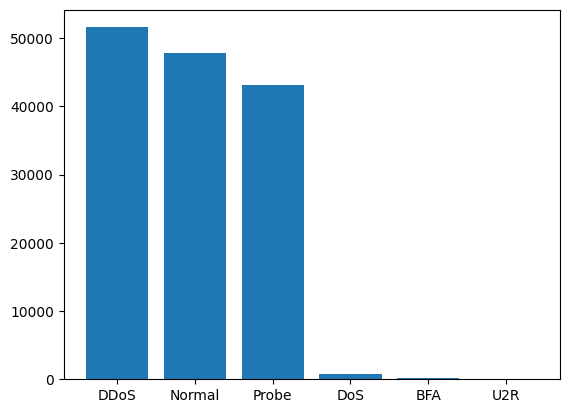

In [29]:
# visualise label distribution
x,y = train_labels.value_counts().index, train_labels.value_counts().values

plt.bar(x,y)
plt.show()

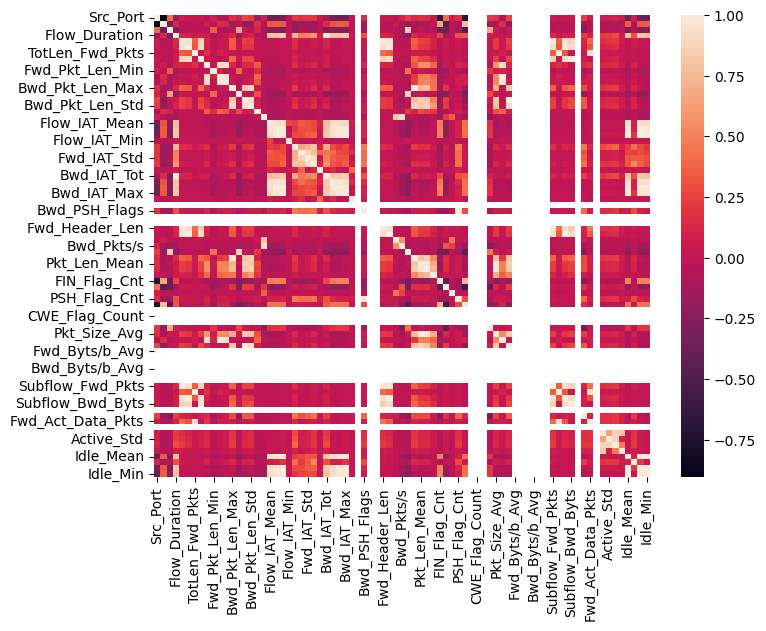

In [30]:
# feature correlation
correlation_matrix = train.corr(method = "pearson")
# correlation heatmap
plt.figure(figsize = (8, 6))
sns.heatmap( correlation_matrix)
plt.show()

In [31]:
correlation_matrix

,Src_Port,Dst_Port,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,...,Fwd_Act_Data_Pkts,Fwd_Seg_Size_Min,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
Src_Port,1.000000,-0.903043,0.408463,-0.145166,0.050648,0.037758,0.012336,0.033849,-0.019634,0.068701,...,0.040198,NaN,0.071633,0.078141,0.093275,0.036443,-0.352647,0.092808,-0.338097,-0.363945
Dst_Port,-0.903043,1.000000,-0.329418,0.134572,-0.045298,-0.032592,-0.008437,-0.028542,0.074871,-0.035731,...,-0.033554,NaN,-0.083619,-0.072533,-0.094501,-0.055584,0.344679,-0.097464,0.329630,0.356215
Protocol,0.408463,-0.329418,1.000000,-0.280577,-0.041504,-0.027529,-0.011296,-0.019679,-0.097959,0.348420,...,-0.022101,NaN,-0.057003,-0.050935,-0.066101,-0.036679,-0.254699,-0.064129,-0.257548,-0.249559
Flow_Duration,-0.145166,0.134572,-0.280577,1.000000,0.123216,0.094294,0.030307,0.068715,0.085370,-0.106421,...,0.099596,NaN,0.204677,0.246933,0.288224,0.082243,0.806488,0.302594,0.826469,0.779474
Tot_Fwd_Pkts,0.050648,-0.045298,-0.041504,0.123216,1.000000,0.947951,0.358868,0.870280,0.110151,-0.015727,...,0.407826,NaN,0.154701,0.187264,0.212998,0.060601,0.008015,0.064981,0.015746,0.001311
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Active_Min,0.036443,-0.055584,-0.036679,0.082243,0.060601,0.035655,0.027866,0.013415,0.053457,-0.013555,...,0.093326,NaN,0.805611,0.087307,0.488649,1.000000,0.028753,0.062372,0.034309,0.023404
Idle_Mean,-0.352647,0.344679,-0.254699,0.806488,0.008015,0.005343,-0.003421,-0.003929,-0.023331,-0.104198,...,0.013074,NaN,0.035745,0.024338,0.029184,0.028753,1.000000,0.107636,0.994924,0.995917
Idle_Std,0.092808,-0.097464,-0.064129,0.302594,0.064981,0.040385,0.012496,0.022177,0.102494,-0.023429,...,0.077410,NaN,0.170803,0.208193,0.207031,0.062372,0.107636,1.000000,0.202446,0.019905
Idle_Max,-0.338097,0.329630,-0.257548,0.826469,0.015746,0.010173,-0.001766,-0.001340,-0.011173,-0.105019,...,0.022541,NaN,0.054250,0.048263,0.053699,0.034309,0.994924,0.202446,1.000000,0.982397


## Exploratory Data Analysis (EDA) Summary
The implication from our EDA findings are as follows :

1. Missing values and outliers: There are no missing values in the trainset. As regards outliers, there are quite a few.
2. Data imbalance: The dataset is strongly imbalanced with respect to the instance labels. This implies that regular classification metrics like accuracy would not be good enough for evaluating the final model.
3. Scaling: Depending on the final learning algorithm used, there might be a need for feature scaling with a good number of the variables in the data. This would discourage the model from assigning undue degrees of importance (i.e., weights) to a variable simply due to average magnitude.
4. Correlation: There is low multicollinearity within the dataset. Some features exhibit strong correlations with one another. Some of these features might need to be eliminated or combined somehow to maintain feature independence.
5. Data dimensionality: There are around ~ 84 different features in the dataset. Although the number of observations (~0.14 million) will offset the curse of dimensionality, the need to reduce the data dimensionality might still arise.
6. Large number of records: The large number of records (~0.14 million) is characteristic of the amount of data generated from the day-to-day operations of the computer networks. As such, optimised algorithms would be required for effective computation.
7. Irrelevant columns: Some columns are irrelevant since they have a variance of zero. These columns need to be eliminated.

# Data Preparation
Next steps is to prepare the data based on findings and Data Implications discovered prior, the following steps will be experimented upon for the data preparation stage.

1. Remove invariant and irrelevant columns: The invariant and irrelevant columns will be eliminated.
2. Feature Scaling: The data will be scaled using the StandardScaler implementation provided by Sci-kit Learn.
3. Feature Selection: The non-numerical features of the dataset are filtered out, and the numerical features are retained. This is done in order to        avoid complicated feature engineering.
4. Distributed Computing: In order to satisfy the need for optimal computation, most of (if not all) the algorithms used will be obtained from PySpark.
All these steps are implemented as below:

In [32]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.2-py2.py3-none-any.whl size=317812365 sha256=bfcb685c458f9b49038d4b8407e58ae9d8842af8ba131755baeb66c88798b3da
  Stored in directory: /root/.cache/pip/wheels/34/34/bd/03944534c44b677cd5859f248090daa9fb27b3c8f8e5f49574
Successfully built pyspark


In [33]:
# Import relevant utilities
from pyspark.ml.feature import VectorAssembler, StringIndexer, IndexToString


In [34]:
# Take a look at the invariant features that needs to be dropped
invariant_features

['Fwd_PSH_Flags',
 'Fwd_URG_Flags',
 'Bwd_URG_Flags',
 'URG_Flag_Cnt',
 'CWE_Flag_Count',
 'ECE_Flag_Cnt',
 'Fwd_Byts/b_Avg',
 'Fwd_Pkts/b_Avg',
 'Fwd_Blk_Rate_Avg',
 'Bwd_Byts/b_Avg',
 'Bwd_Pkts/b_Avg',
 'Bwd_Blk_Rate_Avg',
 'Init_Fwd_Win_Byts',
 'Fwd_Seg_Size_Min']

In [35]:
# Drop invariant columns
train.drop(labels = invariant_features, axis = 1, inplace = True)
test.drop(labels = invariant_features, axis = 1, inplace = True)

In [36]:
train.shape

(93217, 65)

In [37]:
# Drop irrelevant features ( this is the original from Amdari double check)
irrelevant_features = ["Src_Port", "Dst_Port"]
train.drop(labels = irrelevant_features, axis = 1, inplace = True)
test.drop(labels = irrelevant_features, axis = 1, inplace = True)

In [38]:
# Drop irrelevant features this is as suggested , check where did he src_port go?
irrelevant_features = ["Src_Port", "Dst_Port"]

# Check if the columns exist before dropping
for col in irrelevant_features:
    if col in train.columns:
        train.drop(labels = col, axis = 1, inplace = True)
    else:
        print(f"Column {col} not found in train DataFrame")

    if col in test.columns:
        test.drop(labels = col, axis = 1, inplace = True)
    else:
        print(f"Column {col} not found in test DataFrame")

Column Src_Port not found in train DataFrame
Column Src_Port not found in test DataFrame
Column Dst_Port not found in train DataFrame
Column Dst_Port not found in test DataFrame


In [39]:
train.head(n = 5)

,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,...,Init_Bwd_Win_Byts,Fwd_Act_Data_Pkts,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min
0,6,268599,2,3,0,23,0,0,0.0,0.00000,...,64,0,0.0,0.0,0,0,0.0,0.0,0,0
1,6,22194,5,5,53,30,30,0,10.6,14.72413,...,215,2,0.0,0.0,0,0,0.0,0.0,0,0
2,6,8782,4,4,30,30,30,0,7.5,15.00000,...,215,1,0.0,0.0,0,0,0.0,0.0,0,0
3,6,4047,2,2,0,0,0,0,0.0,0.00000,...,5792,0,0.0,0.0,0,0,0.0,0.0,0,0
4,6,3819,2,2,0,0,0,0,0.0,0.00000,...,5792,0,0.0,0.0,0,0,0.0,0.0,0,0


In [40]:
# eliminate duplicated labels
train_labels = train.loc[train.index]
test_labels = test.loc[test.index]

In [41]:
# Reload the original datasets from Google Drive

train_original = pd.read_csv('/content/drive/My Drive/ML Approach to Network Intrusion/train_data.csv')
test_original = pd.read_csv('/content/drive/My Drive/ML Approach to Network Intrusion/test_data.csv')

# Verify that 'Label' is in the columns
print("'Label' in train_original:", 'Label' in train_original.columns)
print("'Label' in test_original:", 'Label' in test_original.columns)

'Label' in train_original: True
'Label' in test_original: True


In [42]:
# Add the 'Label' column back for pyspark
train["Label"] = train_original["Label"]
test["Label"] = test_original["Label"]

In [43]:
train.head(n = 5)

,Protocol,Flow_Duration,Tot_Fwd_Pkts,Tot_Bwd_Pkts,TotLen_Fwd_Pkts,TotLen_Bwd_Pkts,Fwd_Pkt_Len_Max,Fwd_Pkt_Len_Min,Fwd_Pkt_Len_Mean,Fwd_Pkt_Len_Std,...,Fwd_Act_Data_Pkts,Active_Mean,Active_Std,Active_Max,Active_Min,Idle_Mean,Idle_Std,Idle_Max,Idle_Min,Label
0,6,268599,2,3,0,23,0,0,0.0,0.00000,...,0,0.0,0.0,0,0,0.0,0.0,0,0,U2R
1,6,22194,5,5,53,30,30,0,10.6,14.72413,...,2,0.0,0.0,0,0,0.0,0.0,0,0,U2R
2,6,8782,4,4,30,30,30,0,7.5,15.00000,...,1,0.0,0.0,0,0,0.0,0.0,0,0,BFA
3,6,4047,2,2,0,0,0,0,0.0,0.00000,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA
4,6,3819,2,2,0,0,0,0,0.0,0.00000,...,0,0.0,0.0,0,0,0.0,0.0,0,0,BFA


In [44]:
# eliminate outliers
outlier_detector =  LocalOutlierFactor(novelty = True)
outlier_detector.fit(train.drop(labels = "Label", axis = 1))

LocalOutlierFactor(novelty=True)

In [45]:
#predict outliers in dataset using the outlier detector
train_outliers  = outlier_detector.predict(train.drop(labels = "Label", axis = 1). values)
test_outliers  = outlier_detector.predict(test.drop(labels = "Label", axis = 1). values)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LocalOutlierFactor was fitted with feature names
  warnings.warn(


In [46]:
print('Number of outliers in train data: ', sum(train_outliers == -1))
print('Number of outliers in test data: ', sum(test_outliers == -1))

Number of outliers in train data:  4957
Number of outliers in test data:  2457


In [47]:
# data shape preview
train.shape,test.shape


((93217, 64), (40402, 64))

In [48]:
# eliminating outliers
train = train.loc[train_outliers ==1 ]
test = test.loc[test_outliers ==1 ]

In [49]:
# data shape preview
train.shape,test.shape

((88260, 64), (37945, 64))

In [50]:
# scale data features
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [51]:
df = train.drop(labels = "Label", axis = 1)
difference = df.max() - df.min()

In [52]:
difference

,0
Protocol,17.0
Flow_Duration,119999987.0
Tot_Fwd_Pkts,2800.0
Tot_Bwd_Pkts,8617.0
TotLen_Fwd_Pkts,6315520.0
...,...
Active_Min,25100000.0
Idle_Mean,119000000.0
Idle_Std,49600000.0
Idle_Max,119000000.0


In [53]:
# pick out categorical features
categorical_columns = ["protocol"]

categorical_columns += [c for c in train.columns if "Flag" in c]

In [54]:
categorical_columns

['protocol',
 'Bwd_PSH_Flags',
 'FIN_Flag_Cnt',
 'SYN_Flag_Cnt',
 'RST_Flag_Cnt',
 'PSH_Flag_Cnt',
 'ACK_Flag_Cnt']

In [55]:
# Set threshold for feature scaling
threshold = 100

scale_columns = difference.loc[difference >= threshold].index.tolist()

In [56]:
scale_columns

['Flow_Duration',
 'Tot_Fwd_Pkts',
 'Tot_Bwd_Pkts',
 'TotLen_Fwd_Pkts',
 'TotLen_Bwd_Pkts',
 'Fwd_Pkt_Len_Max',
 'Fwd_Pkt_Len_Min',
 'Fwd_Pkt_Len_Mean',
 'Fwd_Pkt_Len_Std',
 'Bwd_Pkt_Len_Max',
 'Bwd_Pkt_Len_Min',
 'Bwd_Pkt_Len_Mean',
 'Bwd_Pkt_Len_Std',
 'Flow_Byts/s',
 'Flow_Pkts/s',
 'Flow_IAT_Mean',
 'Flow_IAT_Std',
 'Flow_IAT_Max',
 'Flow_IAT_Min',
 'Fwd_IAT_Tot',
 'Fwd_IAT_Mean',
 'Fwd_IAT_Std',
 'Fwd_IAT_Max',
 'Fwd_IAT_Min',
 'Bwd_IAT_Tot',
 'Bwd_IAT_Mean',
 'Bwd_IAT_Std',
 'Bwd_IAT_Max',
 'Bwd_IAT_Min',
 'Fwd_Header_Len',
 'Bwd_Header_Len',
 'Fwd_Pkts/s',
 'Bwd_Pkts/s',
 'Pkt_Len_Min',
 'Pkt_Len_Max',
 'Pkt_Len_Mean',
 'Pkt_Len_Std',
 'Pkt_Len_Var',
 'Pkt_Size_Avg',
 'Fwd_Seg_Size_Avg',
 'Bwd_Seg_Size_Avg',
 'Subflow_Fwd_Pkts',
 'Subflow_Fwd_Byts',
 'Subflow_Bwd_Pkts',
 'Subflow_Bwd_Byts',
 'Init_Bwd_Win_Byts',
 'Fwd_Act_Data_Pkts',
 'Active_Mean',
 'Active_Std',
 'Active_Max',
 'Active_Min',
 'Idle_Mean',
 'Idle_Std',
 'Idle_Max',
 'Idle_Min']

In [57]:
# transform columns to their numerical indexs
columns =  difference.index.tolist()
int_scale_columns = [columns.index(c) for c in scale_columns if c not in categorical_columns]


In [58]:
int_scale_columns

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62]

In [59]:
# keep list that we wont be scaling
remainder_columns = [c for c in range(len(columns)) if c not in int_scale_columns]

In [60]:
remainder_columns

[0, 30, 40, 41, 42, 43, 44, 45]

In [61]:
# implement custom scaling operation
def scale_data( train, test, columns_to_scale):
    X_train, y_train = train.drop(labels = "Label", axis = 1), train["Label"]
    X_test, y_test = test.drop(labels = "Label", axis = 1), test["Label"]
    transformer = ColumnTransformer(
        transformers = [
            ("scaler",  StandardScaler(), columns_to_scale)],
            remainder = "passthrough"
             )
    # train transformer
    transformer.fit(X_train)
    # apply transformer on test and train datasets
    X_train = transformer.transform(X_train)
    X_test = transformer.transform(X_test)
    columns  = transformer.get_feature_names_out()
    columns = [c.split("_")[-1] for c in columns]
    train, test = pd.DataFrame(data = X_train, columns = columns), pd.DataFrame(data = X_test, columns = columns)

    train["Label"] = y_train
    test ["Label"] = y_test
    return transformer, train, test


In [62]:
scaler, train,test = scale_data(train, test, int_scale_columns)

In [63]:
train.head(n = 5)

,Duration,Pkts,Pkts,Pkts,Pkts,Max,Min,Mean,Std,Max,...,Min,Protocol,Flags,Cnt,Cnt,Cnt,Cnt,Cnt,Ratio,Label
0,-0.478507,-0.105272,-0.076650,-0.039043,-0.048972,-0.240282,-0.236982,-0.213714,-0.195173,-0.176636,...,-0.455063,6.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,U2R
1,-0.486582,-0.017883,-0.051085,-0.036672,-0.048949,-0.206697,-0.236982,-0.184624,-0.160345,-0.174905,...,-0.455063,6.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,U2R
2,-0.487021,-0.047012,-0.063867,-0.037701,-0.048949,-0.206697,-0.236982,-0.193131,-0.159693,-0.174905,...,-0.455063,6.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,BFA
3,-0.487177,-0.105272,-0.089432,-0.039043,-0.049048,-0.240282,-0.236982,-0.213714,-0.195173,-0.182324,...,-0.455063,6.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,BFA
4,-0.487184,-0.105272,-0.089432,-0.039043,-0.049048,-0.240282,-0.236982,-0.213714,-0.195173,-0.182324,...,-0.455063,6.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,BFA


In [64]:
# Replace NaN values in the Label column with "Normal"
train["Label"].fillna("Normal", inplace=True)
test["Label"].fillna("Normal", inplace=True)


train["Label"].unique()
test["Label"].unique()

array(['BFA', 'Normal', 'DDoS', 'DoS', 'Probe'], dtype=object)

In [65]:
#instantiate spark session
from pyspark.sql.session import  SparkSession

# Instantiate Spark session
spark = SparkSession.builder.master("local").appName("Network Intrusion").config("spark.some.config.option", "some-value").getOrCreate()
# Verify the session was created
print(spark)

In [66]:
# convert pandas dataframe to spark format for train set
train = spark.createDataFrame(train)
# convert pandas dataframe to spark format for test set
test = spark.createDataFrame(test)

In [67]:
print(type(train))
print(type(test))

<class 'pyspark.sql.dataframe.DataFrame'>
<class 'pyspark.sql.dataframe.DataFrame'>


In [68]:
# Assemble features in vectors
assembler = VectorAssembler(inputCols = [c for c in train.columns if c != "Label"], outputCol = "features")
# Label encoding
string_encoder = StringIndexer(inputCol = "Label", outputCol = "Int_Label")

In [69]:
#fit string encoder
string_encoder = string_encoder.fit(train)

train = string_encoder.transform(train)
test = string_encoder.transform(test)

In [70]:
# take a peek at the data
train.show(2)


+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+-------------------+-------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------

In [71]:

# Remove duplicate columns from the DataFrame
train = train.drop(*[col for col in train.columns if train.columns.count(col) > 1])
test = test.drop(*[col for col in test.columns if test.columns.count(col) > 1])

# Now apply VectorAssembler
input_columns = [c for c in train.columns if c not in ["Label", "Int_Label"]]

assembler = VectorAssembler(inputCols=input_columns, outputCol="features")

# Transform the train and test sets
train = assembler.transform(train)
test = assembler.transform(test)

# Show the resulting DataFrame
train.select("features").show(5)


+--------------------+
|            features|
+--------------------+
|[-0.4785065103901...|
|[-0.4865818002916...|
|[-0.4870213440840...|
|[-0.4871765215263...|
|[-0.4871839936397...|
+--------------------+
only showing top 5 rows



In [72]:

# Show the resulting DataFrame
train.show(2)

+-------------------+--------------------+--------------------+--------+-----+-----+-----+---------+--------------------+
|           Duration|              Byts/s|                 Var|Protocol|Flags|Ratio|Label|Int_Label|            features|
+-------------------+--------------------+--------------------+--------+-----+-----+-----+---------+--------------------+
|-0.4785065103901925|-0.21075193550633378|-0.08888790657442286|     6.0|  0.0|  1.0|  U2R|      5.0|[-0.4785065103901...|
|-0.4865818002916379|-0.20599018179496942|-0.08887223407415658|     6.0|  0.0|  1.0|  U2R|      5.0|[-0.4865818002916...|
+-------------------+--------------------+--------------------+--------+-----+-----+-----+---------+--------------------+
only showing top 2 rows



## Data Modelling
1. Logistic Regression
2. Decision Tree
3. OVR+ Logistic Regression


In [73]:
from pyspark.ml.classification import LogisticRegression, DecisionTreeClassifier, OneVsRest

In [74]:
# Instantiate models
dtc_model = DecisionTreeClassifier(featuresCol = "features", labelCol = "Int_Label", predictionCol = "prediction", maxDepth = 10, impurity = 'entropy')
log_model = LogisticRegression(featuresCol = "features",  labelCol = "Int_Label", predictionCol ="prediction", maxIter=500, aggregationDepth=2)
ovr_model = OneVsRest(
   featuresCol = "features", labelCol="Int_Label",classifier = LogisticRegression(featuresCol  = "features",  labelCol = "Int_Label", predictionCol = "prediction", maxIter=500, aggregationDepth=2))

In [75]:
# fit models
dtc_model = dtc_model.fit(train)
log_model = log_model.fit(train)
ovr_model = ovr_model.fit(train)

## Model Evaluation
due to class inbalance we wont be using accuracy rather we use precision and F1 recall
we also use a multiclass evaluator from pyspark

In [76]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [77]:
def generate_model_score(model, data,metric):
  Evaluator = MulticlassClassificationEvaluator(predictionCol = "prediction", labelCol = "Int_Label", metricName = metric)
  predictions = model.transform(data)
  score = Evaluator.evaluate(predictions)
  return score

In [78]:
def print_metrics(metric, train_score,test_score):
  print(f"Train {metric.capitalize()} = {100 * train_score: .3f}%")
  print(f"Test {metric.capitalize()} = {100 * test_score: .3f}%")
  print(f"generalisation error: {100 * (train_score - test_score):.3f}%")
  return


In [79]:
def test_model(model, data, metric):
  if isinstance(metric, str):
    train_score = generate_model_score(model, train, metric)
    test_score = generate_model_score(model, test, metric)
    print_metrics(metric, train_score, test_score)
  else:
    for m in metric:
        train_score = generate_model_score(model, train, m)
        test_score = generate_model_score(model, test, m)
        print_metrics(m.lower(), train_score, test_score)
        print("="*20 + "\n")
  return

In [80]:
# metrics
metrics = ["accuracy", "weightedPrecision", "weightedRecall", "f1"]

In [81]:
# Decision tree
test_model(dtc_model, [train,test], metrics)

Train Accuracy =  85.668%
Test Accuracy =  85.645%
generalisation error: 0.023%

Train Weightedprecision =  86.505%
Test Weightedprecision =  83.955%
generalisation error: 2.549%

Train Weightedrecall =  85.668%
Test Weightedrecall =  85.645%
generalisation error: 0.023%

Train F1 =  84.826%
Test F1 =  84.524%
generalisation error: 0.302%



In [82]:
# Logistic Regression
test_model(log_model, [train,test], metrics)

Train Accuracy =  79.012%
Test Accuracy =  78.558%
generalisation error: 0.454%

Train Weightedprecision =  77.441%
Test Weightedprecision =  76.790%
generalisation error: 0.651%

Train Weightedrecall =  79.012%
Test Weightedrecall =  78.558%
generalisation error: 0.454%

Train F1 =  77.704%
Test F1 =  77.028%
generalisation error: 0.677%



In [83]:
# OVR + Logistic Regression
test_model(ovr_model, [train,test], metrics)

Train Accuracy =  78.929%
Test Accuracy =  78.432%
generalisation error: 0.497%

Train Weightedprecision =  77.387%
Test Weightedprecision =  76.696%
generalisation error: 0.691%

Train Weightedrecall =  78.929%
Test Weightedrecall =  78.432%
generalisation error: 0.497%

Train F1 =  77.604%
Test F1 =  76.885%
generalisation error: 0.719%



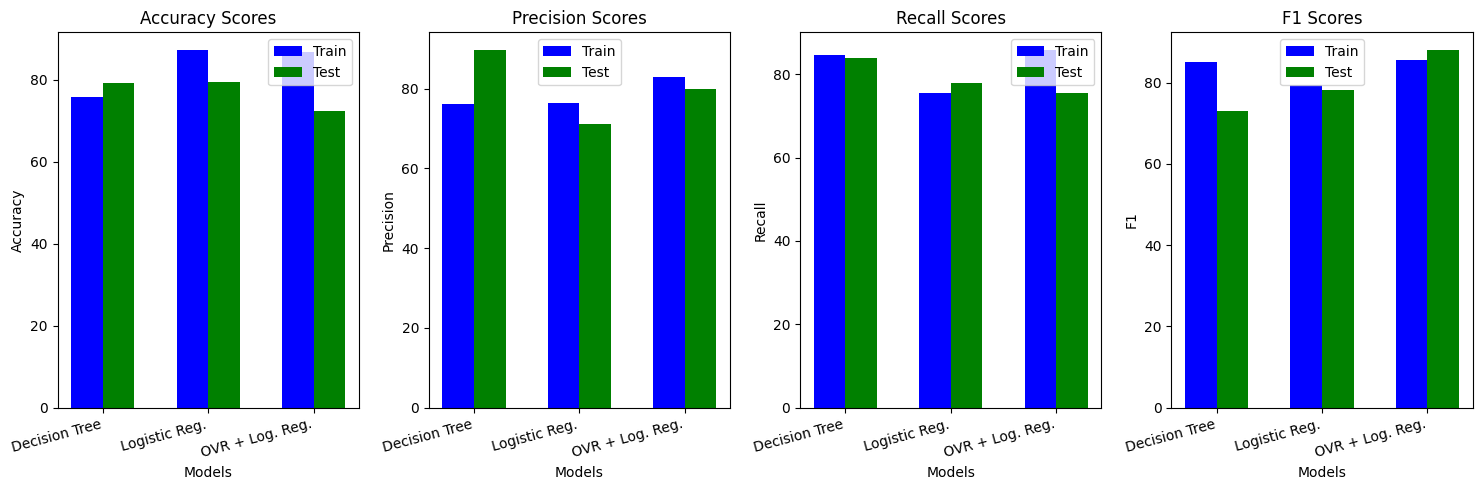

In [84]:
import matplotlib.pyplot as plt
import numpy as np

def generate_model_visualizations(model_names, model_results, metrics):
    """Generates bar charts for model performance across multiple metrics."""

    num_models = len(model_names)
    num_metrics = len(metrics)

    fig, axs = plt.subplots(1, num_metrics, figsize=(15, 5))

    bar_width = 0.3  # Decrease bar width slightly to avoid overlap
    index = np.arange(num_models)  # X-axis values for the number of models

    for i, metric in enumerate(metrics):
        # Extract train and test scores for each model
        train_scores = [results[i][0] for results in model_results]
        test_scores = [results[i][1] for results in model_results]

        # Plot bars for training and testing scores
        axs[i].bar(index, train_scores, bar_width, label='Train', color='b')
        axs[i].bar(index + bar_width, test_scores, bar_width, label='Test', color='g')

        axs[i].set_xlabel('Models')
        axs[i].set_ylabel(metric.capitalize())
        axs[i].set_title(f'{metric.capitalize()} Scores')

        # Use shorter model names and rotate if necessary
        axs[i].set_xticks(index + bar_width / 2)
        axs[i].set_xticklabels(model_names, rotation=15, ha='right')

        axs[i].legend()

    plt.tight_layout()
    plt.show()

# Example function to generate mock model scores (replace this with actual function)
def generate_model_score(model, dataset, metric):
    # Placeholder function for demonstration
    return np.random.uniform(70, 90)  # Simulating random scores between 70% and 90%

# Define models and metrics
model_names = ['Decision Tree', 'Logistic Reg.', 'OVR + Log. Reg.']  # Shortened names
metrics = ['accuracy', 'precision', 'recall', 'f1']  # Example metrics

# Calculate model results for each metric
model_results = []

for model in [dtc_model, log_model, ovr_model]:
    model_metrics = []
    for metric in metrics:
        train_score = generate_model_score(model, 'train', metric)
        test_score = generate_model_score(model, 'test', metric)
        model_metrics.append((train_score, test_score))
    model_results.append(model_metrics)

# Generate visualizations
generate_model_visualizations(model_names, model_results, metrics)


In [85]:
# Get feature importances from the decision tree model
weights = dtc_model.featureImportances

In [86]:
weights.size

6

In [87]:

from pyspark.ml.linalg import SparseVector

def weights_per_label(weights, columns,label = 0):
    # Convert SparseVector to dense vector
    label_weights = weights.toArray().tolist() # extract label weights
    data = dict(zip(columns, label_weights)) # combine
    return pd.Series(data = data)

In [88]:
weights_per_label(weights, columns, label = 0)

,0
Protocol,0.115081
Flow_Duration,0.029817
Tot_Fwd_Pkts,0.748804
Tot_Bwd_Pkts,0.033237
TotLen_Fwd_Pkts,0.004828
TotLen_Bwd_Pkts,0.068234


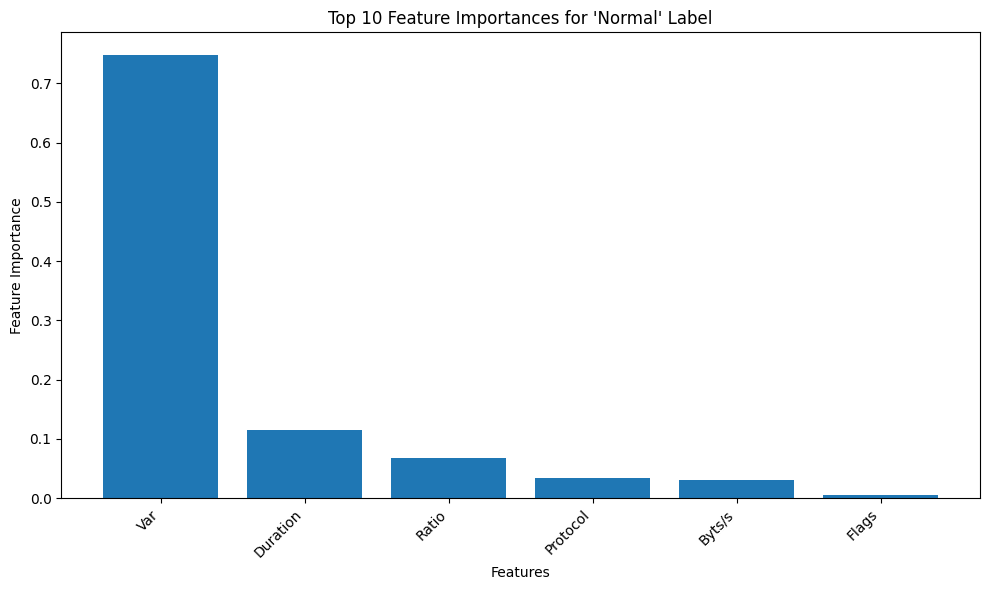

In [89]:

#visualize the top 10  weights for the normal label
import matplotlib.pyplot as plt


def weights_per_label(weights, columns, label=0):
    """Extracts and returns feature weights for a specific label."""
    label_weights = weights.toArray().tolist()  # Extract label weights
    data = dict(zip(columns, label_weights))  # Combine
    return pd.Series(data=data)

# Get feature importances for the 'Normal' label (assuming label 0 corresponds to 'Normal')
normal_label_weights = weights_per_label(weights, [c for c in train.columns if c not in ["Label", "Int_Label"]], label=0)

# Sort weights in descending order and get the top 10
top_10_weights = normal_label_weights.sort_values(ascending=False).head(10)

# Visualize the top 10 weights
plt.figure(figsize=(10, 6))
plt.bar(top_10_weights.index, top_10_weights.values)
plt.xlabel("Features")
plt.ylabel("Feature Importance")
plt.title("Top 10 Feature Importances for 'Normal' Label")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [97]:
# Provide code that builds a prediction  pipeline for the dtc-model

from pyspark.ml import Pipeline

# Create a pipeline with the stages you want to use for prediction
prediction_pipeline = Pipeline(stages=[string_encoder, assembler, dtc_model])



In [100]:
#  Fit the pipeline to the training data

prediction_pipeline_model = prediction_pipeline.fit(train)
